In [ ]:
import pandas as pd

In [45]:
# read in data/datathon_data_encoded.csv for training
data = pd.read_csv('data/datathon_data_freq_encoded.csv')
data.shape

(533009, 10)

In [46]:
# number of rows with label 1
data[data['label'] == 1].shape

(100, 10)

In [44]:
# encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ["WAERS", "BUKRS", "KTOSL", "PRCTR", "BSCHL", "HKONT"]

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for inverse transformation


In [47]:
# train test split
from sklearn.model_selection import train_test_split
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost

In [48]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",  # Binary classification
    eval_metric="logloss",  # Log loss as evaluation metric
    use_label_encoder=False,  # Avoid warnings
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,  # Tree depth
    subsample=0.8,  # Randomly sample training data
    colsample_bytree=0.8  # Feature selection per tree
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:40:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106586
           1       1.00      1.00      1.00        16

    accuracy                           1.00    106602
   macro avg       1.00      1.00      1.00    106602
weighted avg       1.00      1.00      1.00    106602



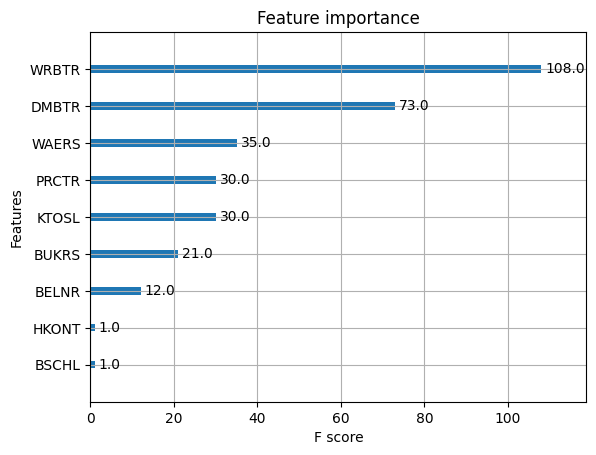

In [49]:
# feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()

# SHAP

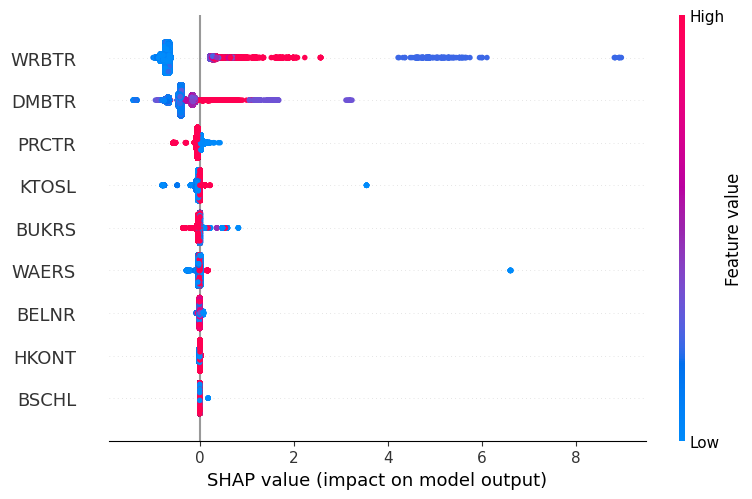

In [50]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_test)